# UMAP: Uniform Manifold Approximation and Projection 
for Dimension Reduction

### Step 1 - Import libraries

In [1]:
# Data manipulation
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

# Visualization
import plotly.express as px # for data visualization
import matplotlib.pyplot as plt # for showing handwritten digits

# Skleran
from sklearn.datasets import load_digits # for MNIST data
from sklearn.model_selection import train_test_split # for splitting data into train and test samples

# UMAP dimensionality reduction
from umap import UMAP

### Step 2 - Load data

#### Load MNIST data

Shape of digit images:  (1797, 8, 8)
Shape of X (main data):  (1797, 64)
Shape of y (true labels):  (1797,)


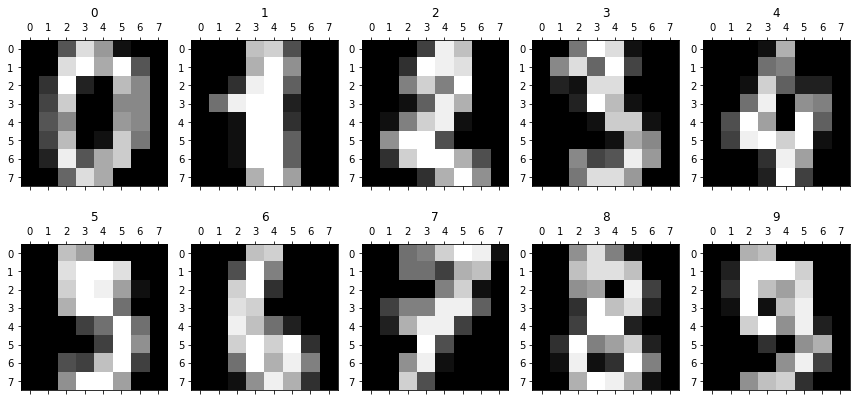

In [2]:
# Load digits data 
digits = load_digits()

# Load arrays containing digit data (64 pixels per image) and their true labels
X, y = load_digits(return_X_y=True)

# Some stats
print('Shape of digit images: ', digits.images.shape)
print('Shape of X (main data): ', X.shape)
print('Shape of y (true labels): ', y.shape)

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
plt.gray() 
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(digits.images[n])
        axs[i,j].set(title=y[n])
        n=n+1
plt.show() 

### Step 3 - Create a function for drawing 3D scatterplots

In [7]:
def chart(X, y):
    #--------------------------------------------------------------------------#
    # This section is not mandatory as its purpose is to sort the data by label 
    # so, we have maintain consistent colors for digits across multiple graphs
    
    # Concatenate X and y arrays
    arr_concat=np.concatenate((X, y.reshape(y.shape[0],1)), axis=1)
    # Create a Pandas dataframe using the above array
    df=pd.DataFrame(arr_concat, columns=['x', 'y', 'z', 'label'])
    # Concert label data type from float to integer
    df['label'] = df['label'].astype(int)
    # Finally, sort the dataframe by label
    df.sort_values(by='label', axis=0, ascending=True, inplace=True)
    #--------------------------------------------------------------------------#
    
    # Create a 3D graph
    fig = px.scatter_3d(df, x='x', y='y', z='z', color=df['label'].astype(str),) #height=900, width=950)

    # Update chart looks
    fig.update_layout(title_text='UMAP',
                      showlegend=True,
                      legend=dict(orientation="h", yanchor="top", y=1, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                            center=dict(x=0, y=0, z=-0.2),
                                            eye=dict(x=1.25, y=-1.15, z=0.5)),
                                            margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))
    # Update marker size
    fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
    
    fig.show()
    return fig

### Step 4 - Apply UMAP

In [4]:
# Configure UMAP hyperparameters
reducer = UMAP(n_neighbors=100, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
               n_components=3, # default 2, The dimension of the space to embed into.
               metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
               n_epochs=1000, # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings. 
               learning_rate=1.0, # default 1.0, The initial learning rate for the embedding optimization.
               init='spectral', # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
               min_dist=0.1, # default 0.1, The effective minimum distance between embedded points.
               spread=1.0, # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
               low_memory=False, # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
               set_op_mix_ratio=1.0, # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
               local_connectivity=1, # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
               repulsion_strength=1.0, # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
               negative_sample_rate=5, # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
               transform_queue_size=4.0, # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
               a=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               b=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               random_state=42, # default: None, If int, random_state is the seed used by the random number generator;
               metric_kwds=None, # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
               angular_rp_forest=False, # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
               target_n_neighbors=-1, # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
               #target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different. 
               #target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
               #target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
               transform_seed=42, # default 42, Random seed used for the stochastic aspects of the transform operation.
               verbose=False, # default False, Controls verbosity of logging.
               unique=False, # default False, Controls if the rows of your data should be uniqued before being embedded. 
              )

# Fit and transform the data
X_trans = reducer.fit_transform(X)

# Check the shape of the new data
print('Shape of X_trans: ', X_trans.shape)


Shape of X_trans:  (1797, 3)


##### Plot the results

In [8]:
graph=chart(X_trans, y)

### Step 4 - Use UMAP in a supervised way

In [19]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# Configure UMAP hyperparameters
reducer2 = UMAP(n_neighbors=100, n_components=3, n_epochs=1000, 
                min_dist=0.5, local_connectivity=2, random_state=42,
              )

# Training on MNIST digits data - this time we also pass the true labels to a fit_transform method
X_train_res = reducer2.fit_transform(X_train, y_train)

# Apply on a test set
X_test_res = reducer2.transform(X_test)

# Print the shape of new arrays
print('Shape of X_train_res: ', X_train_res.shape)
print('Shape of X_test_res: ', X_test_res.shape)

Shape of X_train_res:  (1347, 3)
Shape of X_test_res:  (450, 3)


##### Plot training results

In [25]:
graph=chart(X_train_res, y_train)

##### Plot test results

In [28]:
graph=chart(X_test_res, y_test)

# End of Program